<a href="https://colab.research.google.com/github/annatsv/deepcolor/blob/main/DeepColor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepColor 🌈 🤖

Anna Tsvetkov, Samuel Walhout, and Taojie Wang



---
Tasks (from Devpost):

Downloading Subsets of Datasets (COCO, Places2, ADE20K)


*   Coco Dataset - Anna (Done)
*   Places2 Dataset - Samuel (Done)
*   ADE20K Dataset - Anna (Done)


Preprocessing

*   Preprocessing Coco Dataset - Anna (Done)
*   Preprocessing Places2 or 365 Dataset - Samuel (Done)
*   Preprocessing ADE20K Dataset - Anna (Done)


Models

*   UNet - Samuel (Done)
*   DenseNet - Taojie (Done)
*   MobileNet - Anna (Done)



Data Analysis and Visualizations

*   Ablation Experiments - Samuel (Done)
*   User Study - Anna (Done)
*   MSE - Taojie (Done)
*   PSNR - Taojie (Done)

## Downloading Dataset Subsets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### COCO (Common Objects in Context)

In [ ]:
!pip install fiftyone
import fiftyone as fo
import fiftyone.zoo as foz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 10.3 MB/s eta 0:00:00
  Installing build depende

INFO:fiftyone.migrations.runner:Migrating database to v0.23.8


In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections"],
    classes=["person", "car", "dog", "cat", "bird", "chair"],
    max_samples=1500, # 5000 already downloaded in drive
    dataset_dir="/content/drive/My Drive/coco_subset"
)

shuffled_dataset = dataset.shuffle(seed=42)

# split the dataset
train_fraction = 0.8
num_train = int(train_fraction * len(shuffled_dataset))
train_dataset = shuffled_dataset.take(num_train)
val_dataset = shuffled_dataset.skip(num_train)

print("Training dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))



INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/content/drive/My Drive/coco_subset/train' if necessary


Found annotations at '/content/drive/My Drive/coco_subset/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/content/drive/My Drive/coco_subset/raw/instances_train2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |███████████████| 1500/1500 [9.8s elapsed, 0s remaining, 164.9 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 1500/1500 [9.8s elapsed, 0s remaining, 164.9 samples/s]       


Dataset 'coco-2017-train-1500' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-1500' created


Training dataset size: 1200
Validation dataset size: 300


In [ ]:
# sanity check for populated training directory (which will also later be split into training/validation)

import os

train_dir = "/content/drive/My Drive/coco_subset/train" # **add a /data*** that is where all the COCO images are (5000 total that end with ".jpg" to be split into training validation later)

def count_files(directory):
    # counts only files with image extensions
    image_extensions = {'.jpg', '.jpeg', '.png'}
    total_images = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                total_images += 1
    return total_images

def remove_one_file(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                os.remove(os.path.join(root, file))
                return

train_images_count = count_files(train_dir)
print(f"Number of images in the training directory: {train_images_count}")

if train_images_count == 5001:
    remove_one_file(train_dir)
    train_images_count = count_files(train_dir)

print(f"Number of images after adjustment in the training directory: {train_images_count}")
assert train_images_count == 5000, "Training directory does not contain the expected number of images after adjustment."

def list_first_ten_images(directory):
    files = []
    for root, dirs, file_names in os.walk(directory):
        for file_name in file_names:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                files.append(file_name)
    files.sort()
    return files[:10]

first_ten_images = list_first_ten_images(train_dir)

for i, filename in enumerate(first_ten_images, 1):
    print(f"Image {i}: {filename}")



Number of images in the training directory: 5000
Number of images after adjustment in the training directory: 5000
Image 1: 000000000036.jpg
Image 2: 000000000042.jpg
Image 3: 000000000049.jpg
Image 4: 000000000061.jpg
Image 5: 000000000064.jpg
Image 6: 000000000071.jpg
Image 7: 000000000074.jpg
Image 8: 000000000077.jpg
Image 9: 000000000086.jpg
Image 10: 000000000094.jpg


### Places365
---
Might consider changing from Places2 dataset because Places365_small is available in TensorFlow Datasets. But need to find a way to get subset of this?

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image
import os

In [ ]:
#create filepath-- added for training and validation subsets
places365_train_dir = '/content/drive/My Drive/Places365_subset/train'
places365_val_dir = '/content/drive/My Drive/Places365_subset/validation'

#make directory
os.makedirs(places365_train_dir, exist_ok=True)
os.makedirs(places365_val_dir, exist_ok=True)

# make a tf.data.Dataset
#'test' has 328,500 images | 'train' has 1,803,460 images | 'validation' has 36,500 images
# just loading validation to make it faster but could change later
ds = tfds.load('places365_small', split='validation', shuffle_files=True)
ds = ds.shuffle(buffer_size=10000)

# can change the number in 'dataset.take(x)' to whatever value we want
ds = ds.take(5000)

total_samples = 5000
train_size = int(0.8 * total_samples)
val_size = total_samples - train_size

train_ds = ds.take(train_size)
val_ds = ds.skip(train_size)


# function to save images from dataset to directory
def save_images(dataset, directory):
    index = 0  # Reset index for each set
    for features in dataset:
        image = Image.fromarray(features['image'].numpy())
        image.save(os.path.join(directory, f'image_{index}.jpeg'))
        index += 1

# save the datasets
save_images(train_ds, places365_train_dir)
save_images(val_ds, places365_val_dir)

# count files in a directory
def count_images(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

# number of images saved in each directory
print(f"Training images saved to {places365_train_dir}: {count_images(places365_train_dir)} images")
print(f"Validation images saved to {places365_val_dir}: {count_images(places365_val_dir)} images")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1803460 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/places365_small/2.1.0.incomplete6V8372/places365_small-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/328500 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/places365_small/2.1.0.incomplete6V8372/places365_small-test.tfrecord*...: …

Generating validation examples...:   0%|          | 0/36500 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/places365_small/2.1.0.incomplete6V8372/places365_small-validation.tfrecord…

Dataset places365_small downloaded and prepared to /root/tensorflow_datasets/places365_small/2.1.0. Subsequent calls will reuse this data.
Training images saved to /content/drive/My Drive/Places365_subset/train: 4000 images
Validation images saved to /content/drive/My Drive/Places365_subset/validation: 1000 images


In [ ]:
import os

base_dir = '/content/drive/My Drive/Places365_subset' # has 1000 images, subdirectories "train" has 4000, "validation" has 1000 end with ".jpeg"

def count_images(directory):
    return sum(1 for name in os.listdir(directory) if name.endswith('.jpeg') and os.path.isfile(os.path.join(directory, name)))

total_images_base = count_images(base_dir)
print(f"Total images in the base directory '{base_dir}': {total_images_base} images")

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

if os.path.exists(train_dir):
    total_images_train = count_images(train_dir)
    print(f"Total images in the training directory '{train_dir}': {total_images_train} images")
else:
    print(f"Training directory '{train_dir}' does not exist.")

if os.path.exists(validation_dir):
    total_images_validation = count_images(validation_dir)
    print(f"Total images in the validation directory '{validation_dir}': {total_images_validation} images")
else:
    print(f"Validation directory '{validation_dir}' does not exist.")




Total images in the base directory '/content/drive/My Drive/Places365_subset': 0 images
Total images in the training directory '/content/drive/My Drive/Places365_subset/train': 4000 images
Total images in the validation directory '/content/drive/My Drive/Places365_subset/validation': 1000 images


### ADE20k

In [ ]:
!pip install datasets
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
from PIL import Image
import os
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
dataset = load_dataset("HannahKniesel/ade20k_gt", split='train')

base_dir = '/content/drive/My Drive/ade20k_subset' # Training images saved to /content/drive/My Drive/ade20k_subset/train: 4000 images; Validation images saved to /content/drive/My Drive/ade20k_subset/validation: 1000 images
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

dataset = dataset.shuffle(seed=42)
total_samples = 1500
train_samples = int(0.8 * total_samples)  # 80% for training

def save_image(image, path):
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)
    elif not isinstance(image, Image.Image):
        raise TypeError("The loaded data is not in a recognized image format.")
    image = image.resize((256, 256)).convert('RGB')
    image.save(path)

for i, example in enumerate(dataset.take(train_samples)):
    save_image(example['image'], os.path.join(train_dir, f'image_{i}.jpeg'))

for i, example in enumerate(dataset.skip(train_samples).take(total_samples - train_samples)):
    save_image(example['image'], os.path.join(val_dir, f'image_{i + train_samples}.jpeg'))

def count_images(directory):
    return len([name for name in os.listdir(directory) if name.endswith('.jpeg') and os.path.isfile(os.path.join(directory, name))])

train_count = count_images(train_dir)
val_count = count_images(val_dir)

print(f"Training images saved to {train_dir}: {train_count} images")
print(f"Validation images saved to {val_dir}: {val_count} images")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/20210 [00:00<?, ? examples/s]

Training images saved to /content/drive/My Drive/ade20k_subset/train: 4000 images
Validation images saved to /content/drive/My Drive/ade20k_subset/validation: 1300 images


In [ ]:
import os

base_dir = '/content/drive/My Drive/ade20k_subset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

def count_images(directory):
    return len([name for name in os.listdir(directory) if name.endswith('.jpeg') and os.path.isfile(os.path.join(directory, name))])

train_count = count_images(train_dir)
val_count = count_images(val_dir)

print(f"Training images saved to {train_dir}: {train_count} images - {'Correct' if train_count == 4000 else 'Incorrect'}")
print(f"Validation images saved to {val_dir}: {val_count} images - {'Correct' if val_count == 1000 else 'Incorrect'}")





Training images saved to /content/drive/My Drive/ade20k_subset/train: 4000 images - Correct
Validation images saved to /content/drive/My Drive/ade20k_subset/validation: 1300 images - Incorrect


## Preprocessing

Preprocessing Pipeline for all Datasets

In [ ]:
!pip install torch torchvision
import torch
from torchvision import transforms
from PIL import Image
import os


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
# all the directories
dirs = {
    "coco_train": "/content/drive/My Drive/coco_subset/train/data",  # COCO dataset 5000
    "places365_train": "/content/drive/My Drive/Places365_subset/train",
    "places365_val": "/content/drive/My Drive/Places365_subset/validation",
    "ade20k_train": "/content/drive/My Drive/ade20k_subset/train",
    "ade20k_val": "/content/drive/My Drive/ade20k_subset/validation"        # this will give total of 15,000 images
}

# directory to save preprocessed images
save_dir = "/content/drive/My Drive/preprocessed_images"
os.makedirs(save_dir, exist_ok=True)


In [ ]:
# sanity checks for populated directories

def count_images(directory):
    image_extensions = {'.jpg', '.jpeg'}
    total_images = sum(1 for f in os.listdir(directory) if os.path.splitext(f.lower())[1] in image_extensions)
    return total_images

for dir_name, dir_path in dirs.items():
    try:
        total = count_images(dir_path)
        print(f"{dir_name} contains {total} images.")
    except Exception as e:
        print(f"Failed to access {dir_name} due to: {e}")


coco_train contains 5000 images.
places365_train contains 4000 images.
places365_val contains 1000 images.
ade20k_train contains 4000 images.
ade20k_val contains 1300 images.


In [ ]:
# transformation pipeline
transform_pipeline = transforms.Compose([
    transforms.Resize((256, 256)),  # resizes to 256x256 pixels
    transforms.Grayscale(num_output_channels=1),  # converts to grayscale
    transforms.ToTensor(),  # converts to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # normalizes pixel values
])


In [ ]:
def process_and_save_images(directory, save_directory, augment=False):
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.jpg', '.jpeg'))]
    total = len(image_files)
    processed_count = 0

    for file in image_files:
        try:
            with Image.open(os.path.join(directory, file)).convert('RGB') as img:
                # apply transformations
                img_transformed = transform_pipeline(img)

                # optionally apply data augmentation
                #if augment:
                    #img_transformed = data_augmentation(img_transformed)

                # convert back to PIL image to save in JPEG
                img_transformed = transforms.ToPILImage()(img_transformed)
                img_transformed.save(os.path.join(save_directory, file))

                processed_count += 1
        except Exception as e:
            print(f"Error processing {file}: {e}")

    return processed_count

total_processed = 0
for dir_name, dir_path in dirs.items():
    count = process_and_save_images(dir_path, save_dir, augment=True)
    total_processed += count
    print(f"Processed {count}/{total_processed} images from {dir_name}")

print(f"Total images processed and saved: {total_processed}")


total_processed = 0
for dir_name, dir_path in dirs.items():
    count = process_and_save_images(dir_path, save_dir, augment=True)
    total_processed += count
    print(f"Processed {count}/{total_processed} images from {dir_name}")

print(f"Total images processed and saved: {total_processed}")


File image_775.jpeg does not exist in the original directory.


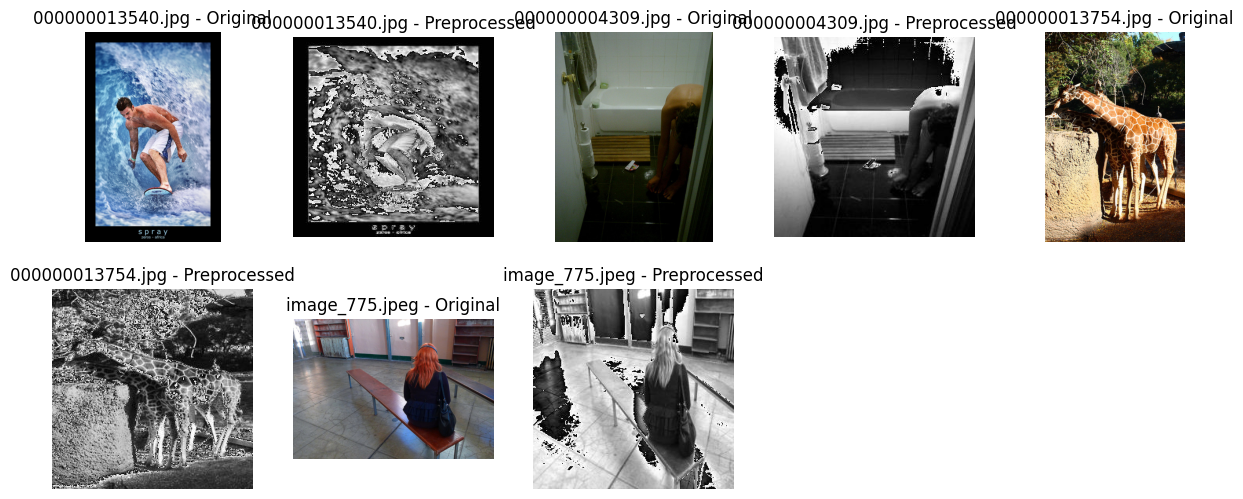

In [ ]:
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torchvision.transforms.functional import to_pil_image
import os
import random

def load_image(path):
    try:
        return to_pil_image(read_image(path))
    except Exception as e:
        print(f"Failed to load image {path}: {e}")
        return None

def show_images(originals, preprocesseds, titles, rows=2, columns=5, figsize=(15, 6)):
    plt.figure(figsize=figsize)
    index = 1
    for original, preprocessed, title in zip(originals, preprocesseds, titles):
        if original is not None and preprocessed is not None:
            plt.subplot(rows, columns, index)
            plt.imshow(original)
            plt.title(title + " - Original")
            plt.axis('off')
            index += 1

            plt.subplot(rows, columns, index)
            plt.imshow(preprocessed, cmap='gray')
            plt.title(title + " - Preprocessed")
            plt.axis('off')
            index += 1
    plt.show()

original_dir = "/content/drive/My Drive/coco_subset/train/data"
preprocessed_dir = "/content/drive/My Drive/preprocessed_images"


preprocessed_files = [f for f in os.listdir(preprocessed_dir) if f.endswith(('.jpg', '.jpeg'))]
selected_files = random.sample(preprocessed_files, 5)  # randomly select 5 images


original_images = []
preprocessed_images = []
for f in selected_files:
    original_path = os.path.join(original_dir, f)
    preprocessed_path = os.path.join(preprocessed_dir, f)
    if os.path.exists(original_path):
        original_images.append(load_image(original_path))
        preprocessed_images.append(load_image(preprocessed_path))
    else:
        print(f"File {f} does not exist in the original directory.")

show_images(original_images, preprocessed_images, selected_files)



### Section 3: Models

U-Net

Took inspiration from https://www.tensorflow.org/tutorials/images/segmentation

In [ ]:
import tensorflow as tf

class EncoderBlock(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, strides):
        super(EncoderBlock, self).__init__()
        self.conv_layer = tf.keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')
        self.batch_norm_layer = tf.keras.layers.BatchNormalization()
        self.leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.1)

    def call(self, inputs):
        x = self.conv_layer(inputs)
        x = self.batch_norm_layer(x)
        x = self.leaky_relu(x)
        return x

class DecoderBlock(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, strides, apply_dropout=False):
        super(DecoderBlock, self).__init__()
        self.trans_conv_layer = tf.keras.layers.Conv2DTranspose(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')
        self.batch_norm_layer = tf.keras.layers.BatchNormalization()
        self.dropout_layer = tf.keras.layers.Dropout(0.5) if apply_dropout else None
        self.relu_activation = tf.keras.layers.ReLU()

    def call(self, inputs, skip_connection):
        x = self.trans_conv_layer(inputs)
        x = tf.concat([x, skip_connection], axis=-1)  # Concatenate with skip connection
        x = self.batch_norm_layer(x)
        if self.dropout_layer is not None:
            x = self.dropout_layer(x)
        x = self.relu_activation(x)
        return x

def build_unet_model(input_shape=(256, 256, 1)):
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Encoder
    encoder1 = EncoderBlock(64, (3, 3), (2, 2))(inputs)
    encoder2 = EncoderBlock(128, (3, 3), (2, 2))(encoder1)
    encoder3 = EncoderBlock(256, (3, 3), (2, 2))(encoder2)
    encoder4 = EncoderBlock(512, (3, 3), (2, 2))(encoder3)

    # Decoder
    decoder1 = DecoderBlock(256, (3, 3), (2, 2), apply_dropout=True)(encoder4, encoder3)
    decoder2 = DecoderBlock(128, (3, 3), (2, 2), apply_dropout=True)(decoder1, encoder2)
    decoder3 = DecoderBlock(64, (3, 3), (2, 2), apply_dropout=True)(decoder2, encoder1)

    # Final layer to generate RGB image
    outputs = tf.keras.layers.Conv2DTranspose(3, (3, 3), strides=(2, 2), padding='same', activation='sigmoid')(decoder3)

    # Create and compile the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

    return model

# Build and instantiate the model
model = build_unet_model()

In [ ]:
import os
import glob


def count_image_files(directory):
    image_extensions = ['jpg', 'jpeg', 'png', 'gif', 'bmp']
    image_count = 0
    for ext in image_extensions:
        image_count += len(glob.glob(os.path.join(directory, f'*.{ext}')))
    return image_count

original_dirs = [
    "/content/drive/My Drive/coco_subset/train/data",
    "/content/drive/My Drive/Places365_subset/train",
    "/content/drive/My Drive/Places365_subset/validation",
    "/content/drive/My Drive/ade20k_subset/train",
    "/content/drive/My Drive/ade20k_subset/validation"
]

for directory in original_dirs:
    if os.path.exists(directory):
        image_count = count_image_files(directory)
        print(f"Directory '{directory}' exists and contains {image_count} image files.")
    else:
        print(f"Directory '{directory}' does not exist.")


Directory '/content/drive/My Drive/coco_subset/train/data' exists and contains 5000 image files.
Directory '/content/drive/My Drive/Places365_subset/train' exists and contains 4000 image files.
Directory '/content/drive/My Drive/Places365_subset/validation' exists and contains 1000 image files.
Directory '/content/drive/My Drive/ade20k_subset/train' exists and contains 4000 image files.
Directory '/content/drive/My Drive/ade20k_subset/validation' exists and contains 1300 image files.


Epoch 1/30
383/383 [==============================] - 48s 115ms/step - loss: 0.0122 - accuracy: 0.4059 - val_loss: 0.0405 - val_accuracy: 0.4994
Epoch 2/30
383/383 [==============================] - 43s 113ms/step - loss: 0.0086 - accuracy: 0.4539 - val_loss: 0.0107 - val_accuracy: 0.5168
Epoch 3/30
383/383 [==============================] - 44s 114ms/step - loss: 0.0082 - accuracy: 0.4843 - val_loss: 0.0073 - val_accuracy: 0.4971
Epoch 4/30
383/383 [==============================] - 44s 114ms/step - loss: 0.0080 - accuracy: 0.4950 - val_loss: 0.0078 - val_accuracy: 0.5104
Epoch 5/30
383/383 [==============================] - 43s 113ms/step - loss: 0.0079 - accuracy: 0.4993 - val_loss: 0.0069 - val_accuracy: 0.4959
Epoch 6/30
383/383 [==============================] - 44s 114ms/step - loss: 0.0079 - accuracy: 0.5019 - val_loss: 0.0067 - val_accuracy: 0.5036
Epoch 7/30
383/383 [==============================] - 43s 113ms/step - loss: 0.0078 - accuracy: 0.5027 - val_loss: 0.0156 - val_ac

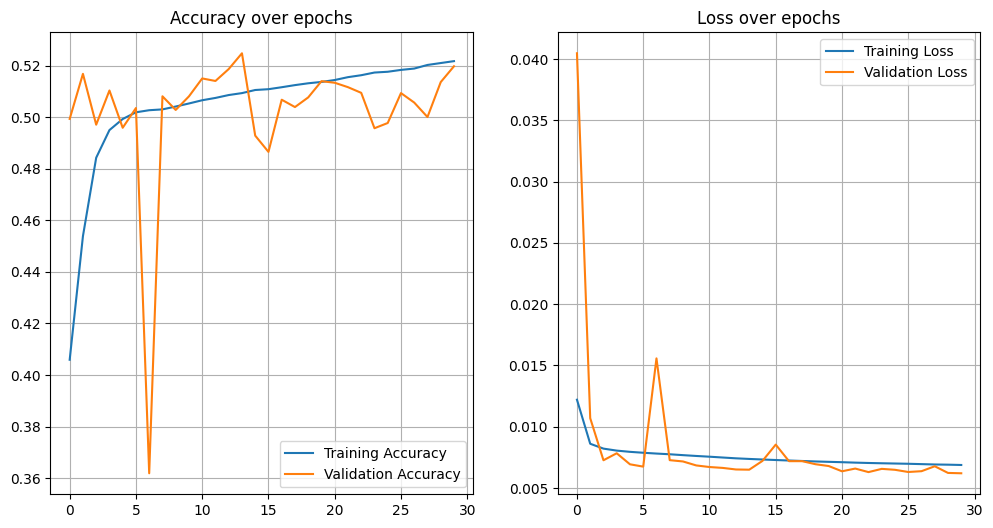

1/1 [==============================] - 0s 194ms/step


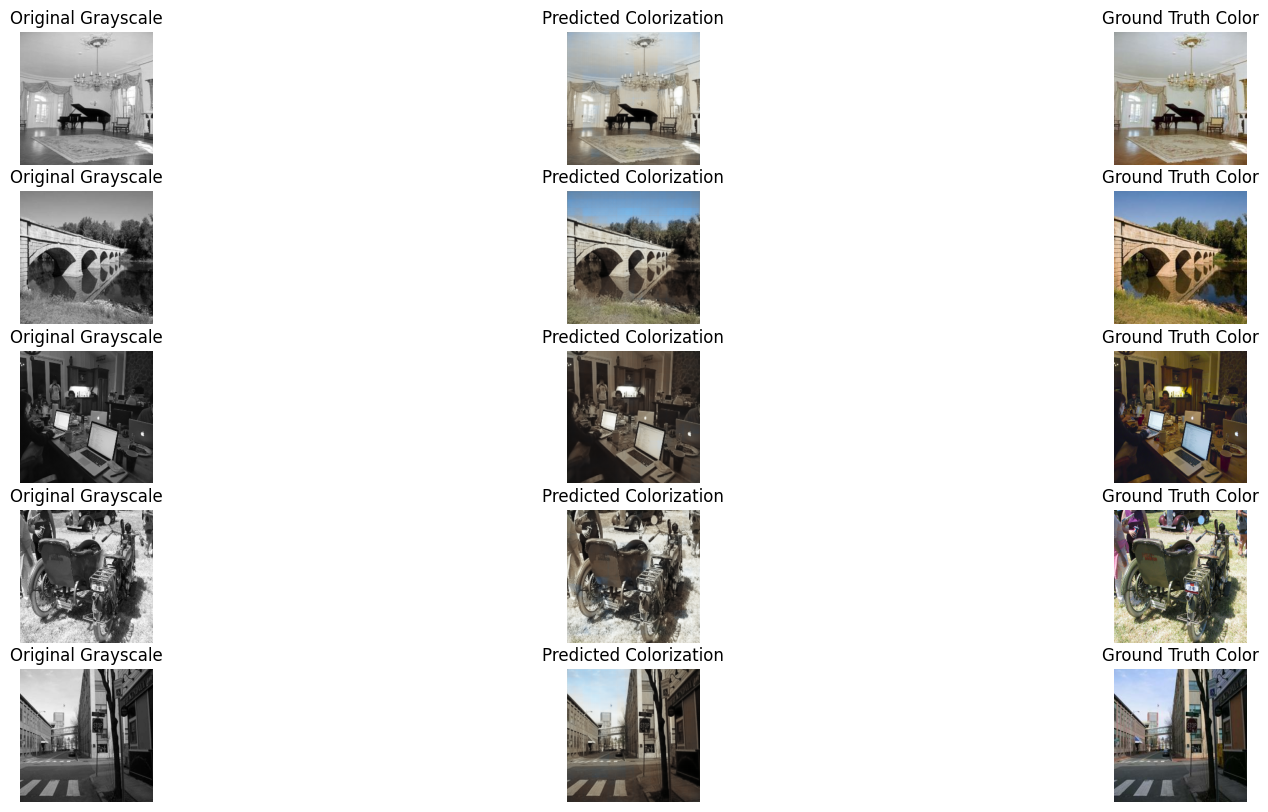

In [ ]:
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def is_valid_image(file_path):
    # Check if the file exists and is not empty
    if not tf.io.gfile.exists(file_path):
        return False
    if tf.io.gfile.stat(file_path).length == 0:
        return False

    # Attempt to decode the image
    try:
        img_raw = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img_raw)
    except tf.errors.InvalidArgumentError:
        return False

    return True

def prepare_image_dataset(paths):
    valid_paths = [p for p in paths if is_valid_image(p)]
    train_paths, val_paths = train_test_split(valid_paths, test_size=0.2, random_state=42)
    return train_paths, val_paths

def process_path(file_path):
    img_raw = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img_raw, channels=3)
    img = tf.image.resize(img, [256, 256])
    img /= 255.0  # Normalize to [0,1]
    img_gray = tf.image.rgb_to_grayscale(img)
    return img_gray, img

# Collect all image paths
original_dirs = [
    "/content/drive/My Drive/coco_subset/train/data",
    "/content/drive/My Drive/Places365_subset/train",
    "/content/drive/My Drive/Places365_subset/validation",
    "/content/drive/My Drive/ade20k_subset/train",
    "/content/drive/My Drive/ade20k_subset/validation"
]

all_paths = []
for dir_path in original_dirs:
    all_paths.extend([os.path.join(dir_path, fname) for fname in os.listdir(dir_path)])

# Filter and split paths
train_paths, val_paths = prepare_image_dataset(all_paths)

# Dataset preparation
def generate_dataset(paths):
    dataset = tf.data.Dataset.from_tensor_slices(paths)
    dataset = dataset.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

train_dataset = generate_dataset(train_paths)
val_dataset = generate_dataset(val_paths)

model = build_unet_model(input_shape=(256, 256, 1))

# Model training
epochs = 30
history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset)

def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history)

def show_predictions(dataset, num_examples=5):
    plt.figure(figsize=(20, 10))
    for images, targets in dataset.take(1):
        predictions = model.predict(images)
        for i in range(min(num_examples, len(images))):
            ax = plt.subplot(num_examples, 3, i * 3 + 1)
            plt.imshow(images[i].numpy().squeeze(), cmap='gray')
            plt.title('Original Grayscale')
            plt.axis('off')

            ax = plt.subplot(num_examples, 3, i * 3 + 2)
            prediction = predictions[i]
            plt.imshow(prediction)
            plt.title('Predicted Colorization')
            plt.axis('off')

            ax = plt.subplot(num_examples, 3, i * 3 + 3)
            plt.imshow(targets[i].numpy())
            plt.title('Ground Truth Color')
            plt.axis('off')

    plt.show()

show_predictions(val_dataset, num_examples=5)


In [ ]:
#MSE and PSNR:

import numpy as np
import math


mse_values = []
psnr_values = []

for images, targets in val_dataset:
    predictions = model.predict(images)
    for i in range(len(images)):
        mse = np.mean((targets[i] - predictions[i]) ** 2)
        psnr = 20 * math.log10(1.0 / math.sqrt(mse))
        mse_values.append(mse)
        psnr_values.append(psnr)

mean_mse = np.mean(mse_values)
mean_psnr = np.mean(psnr_values)

print("Mean Squared Error (MSE) for U-Net model:", mean_mse)
print("Peak Signal-to-Noise Ratio (PSNR) for U-Net model:", mean_psnr)


1/1 [==============================] - 0s 280ms/step
Mean Squared Error (MSE) for U-Net model: 0.006199009
Peak Signal-to-Noise Ratio (PSNR) for U-Net model: 23.799026299751493


Dense-Net

In [ ]:
import tensorflow as tf
!pip install tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate, Activation, BatchNormalization
from tensorflow.keras.applications import DenseNet121

def build_densenet_colorization_model(input_shape=(256, 256, 1)):
    base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(input_shape[0], input_shape[1], 3))

    inputs = Input(shape=input_shape)
    x = Concatenate()([inputs, inputs, inputs])  # concat to mimic three channels

    x = base_model(x)

    x = UpSampling2D(size=(2, 2))(x)  # 8x8 to 16x16
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = UpSampling2D(size=(2, 2))(x)  # 16x16 to 32x32
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = UpSampling2D(size=(2, 2))(x)  # 32x32 to 64x64
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = UpSampling2D(size=(2, 2))(x)  # 64x64 to 128x128
    x = Conv2D(16, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = UpSampling2D(size=(2, 2))(x)  # 128x128 to 256x256
    x = Conv2D(3, (3, 3), padding='same')(x)
    x = Activation('sigmoid')(x)  # ensure the output is scaled between 0 and 1

    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

DenseNet_model = build_densenet_colorization_model(input_shape=(256, 256, 1))

Epoch 1/30
383/383 [==============================] - 122s 181ms/step - loss: 0.0229 - accuracy: 0.4821 - val_loss: 0.0180 - val_accuracy: 0.5379
Epoch 2/30
383/383 [==============================] - 67s 175ms/step - loss: 0.0170 - accuracy: 0.5164 - val_loss: 0.0197 - val_accuracy: 0.5403
Epoch 3/30
383/383 [==============================] - 66s 173ms/step - loss: 0.0156 - accuracy: 0.5282 - val_loss: 0.0221 - val_accuracy: 0.5282
Epoch 4/30
383/383 [==============================] - 66s 173ms/step - loss: 0.0147 - accuracy: 0.5377 - val_loss: 0.0222 - val_accuracy: 0.5460
Epoch 5/30
383/383 [==============================] - 66s 173ms/step - loss: 0.0144 - accuracy: 0.5374 - val_loss: 0.0149 - val_accuracy: 0.5400
Epoch 6/30
383/383 [==============================] - 66s 173ms/step - loss: 0.0136 - accuracy: 0.5464 - val_loss: 0.0135 - val_accuracy: 0.5567
Epoch 7/30
383/383 [==============================] - 66s 173ms/step - loss: 0.0131 - accuracy: 0.5516 - val_loss: 0.0161 - val_a

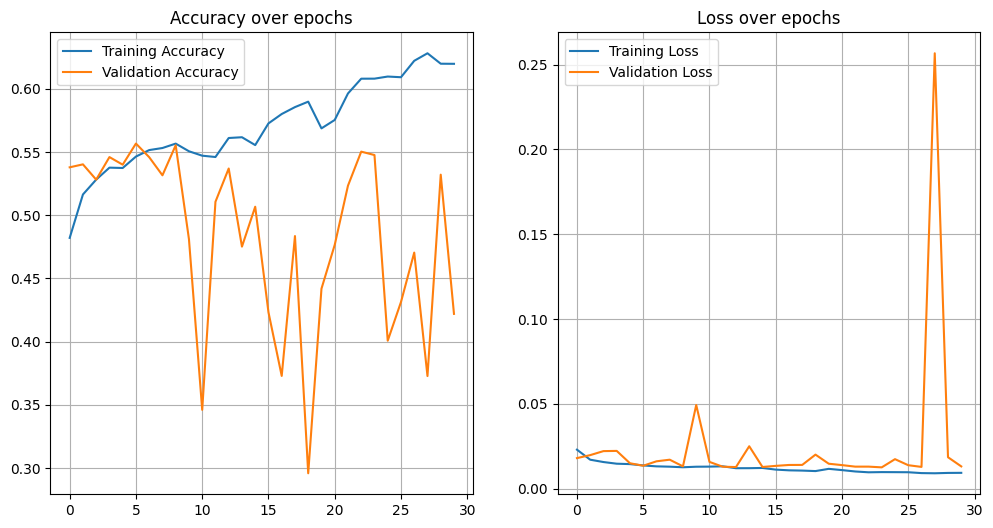

1/1 [==============================] - 2s 2s/step


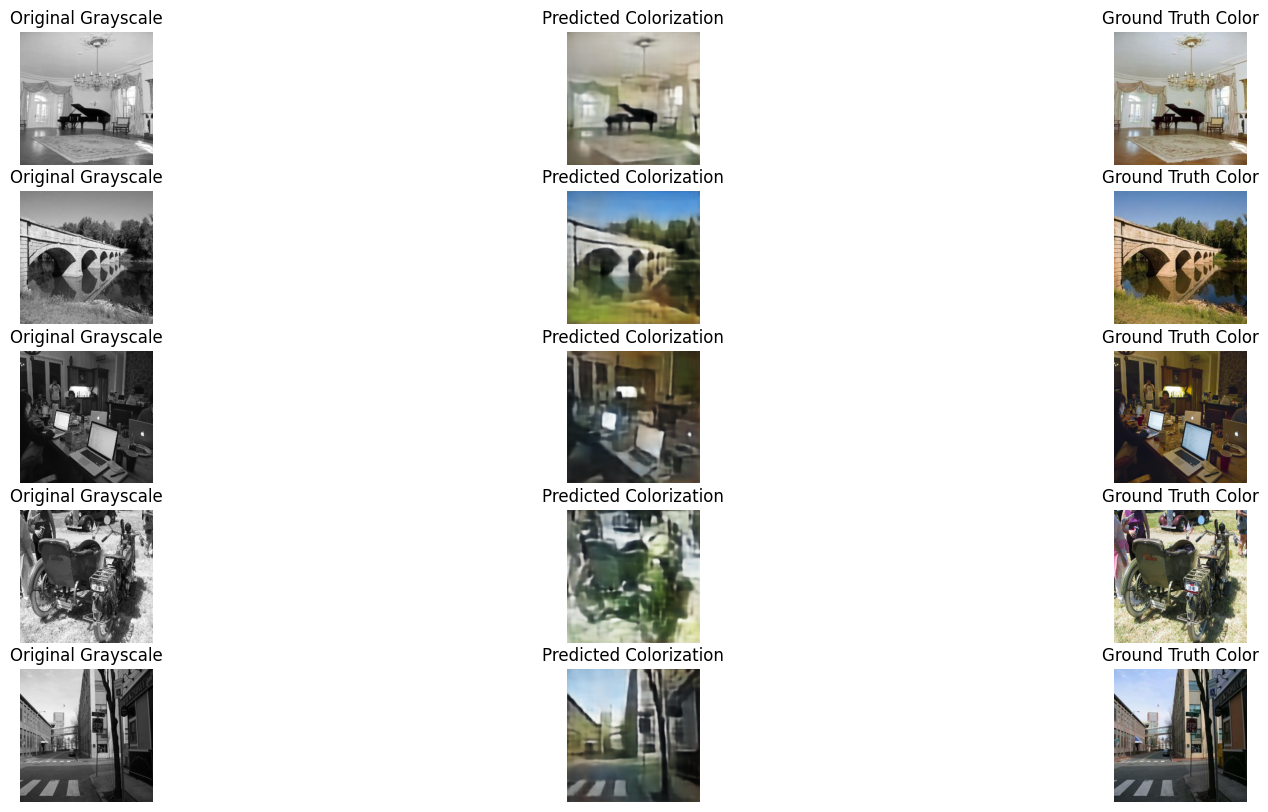

In [ ]:
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def is_valid_image(file_path):
    # Check if the file exists and is not empty
    if not tf.io.gfile.exists(file_path):
        return False
    if tf.io.gfile.stat(file_path).length == 0:
        return False

    # Attempt to decode the image
    try:
        img_raw = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img_raw)
    except tf.errors.InvalidArgumentError:
        return False

    return True

def prepare_image_dataset(paths):
    valid_paths = [p for p in paths if is_valid_image(p)]
    train_paths, val_paths = train_test_split(valid_paths, test_size=0.2, random_state=42)
    return train_paths, val_paths

def process_path(file_path):
    img_raw = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img_raw, channels=3)
    img = tf.image.resize(img, [256, 256])
    img /= 255.0  # Normalize to [0,1]
    img_gray = tf.image.rgb_to_grayscale(img)
    return img_gray, img

# Collect all image paths
original_dirs = [
    "/content/drive/My Drive/coco_subset/train/data",
    "/content/drive/My Drive/Places365_subset/train",
    "/content/drive/My Drive/Places365_subset/validation",
    "/content/drive/My Drive/ade20k_subset/train",
    "/content/drive/My Drive/ade20k_subset/validation"
]

all_paths = []
for dir_path in original_dirs:
    all_paths.extend([os.path.join(dir_path, fname) for fname in os.listdir(dir_path)])

# Filter and split paths
train_paths, val_paths = prepare_image_dataset(all_paths)

# Dataset preparation
def generate_dataset(paths):
    dataset = tf.data.Dataset.from_tensor_slices(paths)
    dataset = dataset.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

train_dataset = generate_dataset(train_paths)
val_dataset = generate_dataset(val_paths)

DenseNet_model = build_densenet_colorization_model(input_shape=(256, 256, 1))

# Model training
epochs = 30
history = DenseNet_model.fit(train_dataset, epochs=epochs, validation_data=val_dataset)

def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history)

def show_predictions(dataset, num_examples=5):
    plt.figure(figsize=(20, 10))
    for images, targets in dataset.take(1):
        predictions = DenseNet_model.predict(images)
        for i in range(min(num_examples, len(images))):
            ax = plt.subplot(num_examples, 3, i * 3 + 1)
            plt.imshow(images[i].numpy().squeeze(), cmap='gray')
            plt.title('Original Grayscale')
            plt.axis('off')

            ax = plt.subplot(num_examples, 3, i * 3 + 2)
            prediction = predictions[i]
            plt.imshow(prediction)
            plt.title('Predicted Colorization')
            plt.axis('off')

            ax = plt.subplot(num_examples, 3, i * 3 + 3)
            plt.imshow(targets[i].numpy())
            plt.title('Ground Truth Color')
            plt.axis('off')

    plt.show()

show_predictions(val_dataset, num_examples=5)


In [ ]:
# MSE and PSNR

import numpy as np
import math

mse_values = []
psnr_values = []

for images, targets in val_dataset:
    predictions = DenseNet_model.predict(images)
    for i in range(len(images)):
        mse = np.mean((targets[i] - predictions[i]) ** 2)
        psnr = 20 * math.log10(1.0 / math.sqrt(mse))
        mse_values.append(mse)
        psnr_values.append(psnr)


mean_mse = np.mean(mse_values)
mean_psnr = np.mean(psnr_values)

print("Mean Squared Error (MSE) for DenseNet model:", mean_mse)
print("Peak Signal-to-Noise Ratio (PSNR) for DenseNet model:", mean_psnr)


1/1 [==============================] - 2s 2s/step
Mean Squared Error (MSE) for DenseNet model: 0.013072129
Peak Signal-to-Noise Ratio (PSNR) for DenseNet model: 19.468669743110155


Mobile-Net

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def build_mobile_net_model(input_shape=(256, 256, 3)):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape, pooling=None)
    base_model.trainable = False

    def add_layers(x, filters, kernel_size, upsample_size=(2, 2)):
        x = UpSampling2D(size=upsample_size)(x)
        x = Conv2D(filters, kernel_size, activation='relu', padding='same')(x)
        return x

    output = base_model.output

    output = add_layers(output, 512, (3, 3), upsample_size=(2, 2))
    output = add_layers(output, 256, (3, 3))
    output = add_layers(output, 128, (3, 3))
    output = add_layers(output, 64, (3, 3))
    output = add_layers(output, 32, (3, 3))

    final_output = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(output)

    model = Model(inputs=base_model.input, outputs=final_output)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])


    return model

model = build_mobile_net_model()
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()





17225924/17225924 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 128, 128, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 128, 128, 32)      288       
 )                                                               
                                                              

Epoch 1/30
383/383 [==============================] - 54s 112ms/step - loss: 0.0525 - accuracy: 0.5078 - val_loss: 0.0484 - val_accuracy: 0.5487
Epoch 2/30
383/383 [==============================] - 39s 101ms/step - loss: 0.0453 - accuracy: 0.5508 - val_loss: 0.0468 - val_accuracy: 0.5527
Epoch 3/30
383/383 [==============================] - 39s 101ms/step - loss: 0.0419 - accuracy: 0.5585 - val_loss: 0.0459 - val_accuracy: 0.5607
Epoch 4/30
383/383 [==============================] - 39s 101ms/step - loss: 0.0387 - accuracy: 0.5623 - val_loss: 0.0456 - val_accuracy: 0.5606
Epoch 5/30
383/383 [==============================] - 39s 101ms/step - loss: 0.0359 - accuracy: 0.5651 - val_loss: 0.0466 - val_accuracy: 0.5629
Epoch 6/30
383/383 [==============================] - 39s 101ms/step - loss: 0.0348 - accuracy: 0.5684 - val_loss: 0.0575 - val_accuracy: 0.5597
Epoch 7/30
383/383 [==============================] - 39s 101ms/step - loss: 0.0349 - accuracy: 0.5704 - val_loss: 0.0462 - val_ac

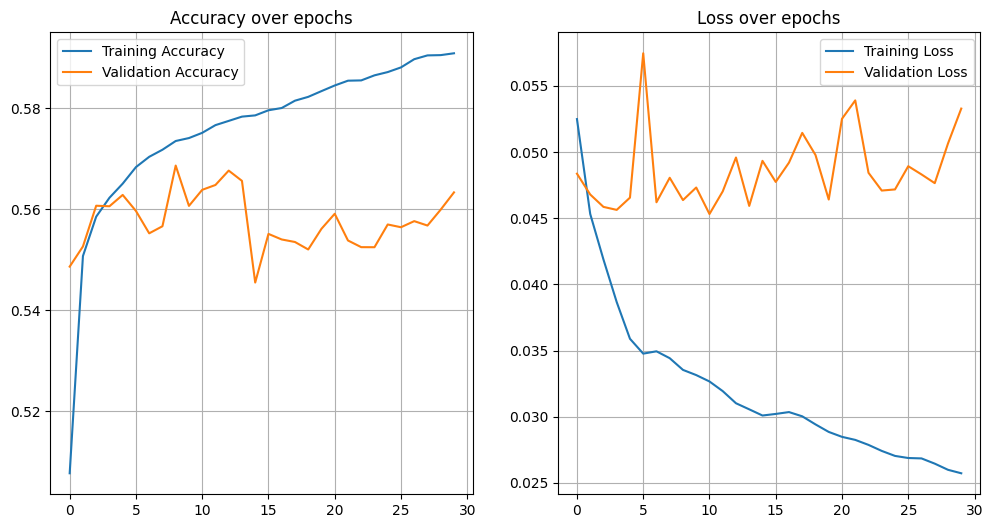

1/1 [==============================] - 1s 555ms/step


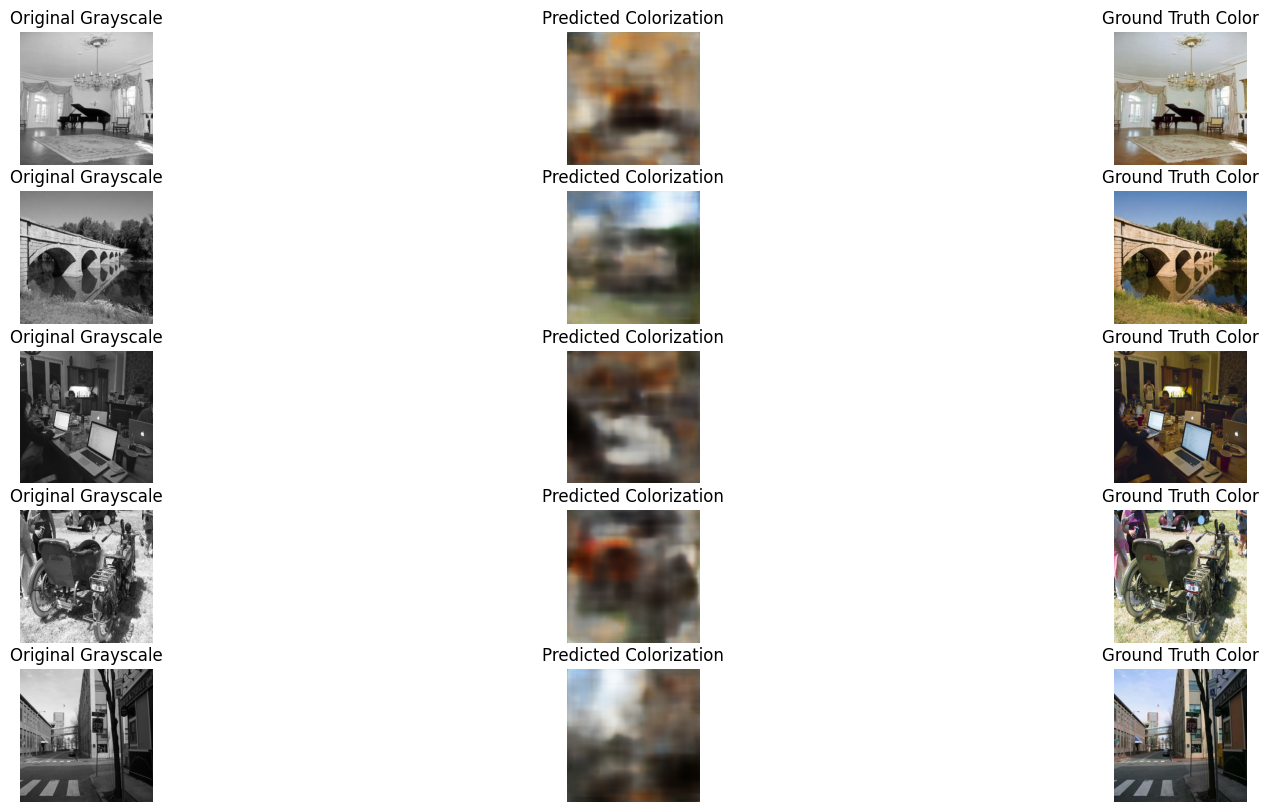

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate, Activation, BatchNormalization
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def is_valid_image(file_path):
    if not tf.io.gfile.exists(file_path) or tf.io.gfile.stat(file_path).length == 0:
        return False
    try:
        img_raw = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img_raw)
    except:
        return False
    return True

def prepare_image_dataset(paths):
    valid_paths = [p for p in paths if is_valid_image(p)]
    train_paths, val_paths = train_test_split(valid_paths, test_size=0.2, random_state=42)
    return train_paths, val_paths

def process_path(file_path):
    img_raw = tf.io.read_file(file_path)
    # decode as a color image
    img_color = tf.image.decode_jpeg(img_raw, channels=3)
    img_color = tf.image.resize(img_color, [256, 256])
    img_color = tf.cast(img_color, tf.float32) / 255.0  # Normalize to [0,1]

    # color image to grayscale
    img_gray = tf.image.rgb_to_grayscale(img_color)
    img_gray = tf.image.grayscale_to_rgb(img_gray)  # grayscale back to RGB

    return img_gray, img_color  # grayscale version and the original color version


model = build_mobile_net_model()

original_dirs = [
    "/content/drive/My Drive/coco_subset/train/data",
    "/content/drive/My Drive/Places365_subset/train",
    "/content/drive/My Drive/Places365_subset/validation",
    "/content/drive/My Drive/ade20k_subset/train",
    "/content/drive/My Drive/ade20k_subset/validation"
]

all_paths = []
for dir_path in original_dirs:
    all_paths.extend([os.path.join(dir_path, fname) for fname in os.listdir(dir_path)])

def generate_dataset(paths):
    dataset = tf.data.Dataset.from_tensor_slices(paths)
    dataset = dataset.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)


train_paths, val_paths = prepare_image_dataset(all_paths)
train_dataset = generate_dataset(train_paths)
val_dataset = generate_dataset(val_paths)

epochs = 30
history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset)

def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

def show_predictions(dataset, num_examples=5):
    plt.figure(figsize=(20, 10))
    for images, targets in dataset.take(1):
        predictions = model.predict(images)
        for i in range(min(num_examples, len(images))):
            ax = plt.subplot(num_examples, 3, i * 3 + 1)
            plt.imshow(images[i].numpy().squeeze(), cmap='gray')
            plt.title('Original Grayscale')
            plt.axis('off')

            ax = plt.subplot(num_examples, 3, i * 3 + 2)
            prediction = predictions[i]
            plt.imshow(prediction)
            plt.title('Predicted Colorization')
            plt.axis('off')

            ax = plt.subplot(num_examples, 3, i * 3 + 3)
            plt.imshow(targets[i].numpy())
            plt.title('Ground Truth Color')
            plt.axis('off')

    plt.show()

plot_training_history(history)
show_predictions(val_dataset, num_examples=5)


In [4]:
# MSE and PSNR

import numpy as np
import math

mse_values = []
psnr_values = []

for images, targets in val_dataset:
    predictions = model.predict(images)
    for i in range(len(images)):
        mse = np.mean((targets[i] - predictions[i]) ** 2)
        psnr = 20 * math.log10(1.0 / math.sqrt(mse))
        mse_values.append(mse)
        psnr_values.append(psnr)

mean_mse = np.mean(mse_values)
mean_psnr = np.mean(psnr_values)

print("Mean Squared Error (MSE) for MobileNet model:", mean_mse)
print("Peak Signal-to-Noise Ratio (PSNR) for MobileNet model:", mean_psnr)


1/1 [==============================] - 0s 486ms/step
Mean Squared Error (MSE) for MobileNet model: 0.053279042
Peak Signal-to-Noise Ratio (PSNR) for MobileNet model: 13.101864320737949


Epoch 1/10
383/383 [==============================] - 43s 105ms/step - loss: 0.0514 - accuracy: 0.5121 - val_loss: 0.0484 - val_accuracy: 0.5583
Epoch 2/10
383/383 [==============================] - 39s 103ms/step - loss: 0.0449 - accuracy: 0.5524 - val_loss: 0.0464 - val_accuracy: 0.5613
Epoch 3/10
383/383 [==============================] - 39s 102ms/step - loss: 0.0412 - accuracy: 0.5586 - val_loss: 0.0454 - val_accuracy: 0.5643
Epoch 4/10
383/383 [==============================] - 39s 103ms/step - loss: 0.0379 - accuracy: 0.5616 - val_loss: 0.0456 - val_accuracy: 0.5648
Epoch 5/10
383/383 [==============================] - 39s 103ms/step - loss: 0.0358 - accuracy: 0.5647 - val_loss: 0.0460 - val_accuracy: 0.5577
Epoch 6/10
383/383 [==============================] - 39s 102ms/step - loss: 0.0357 - accuracy: 0.5675 - val_loss: 0.0528 - val_accuracy: 0.5589
Epoch 7/10
383/383 [==============================] - 39s 102ms/step - loss: 0.0353 - accuracy: 0.5693 - val_loss: 0.0460 - val_ac

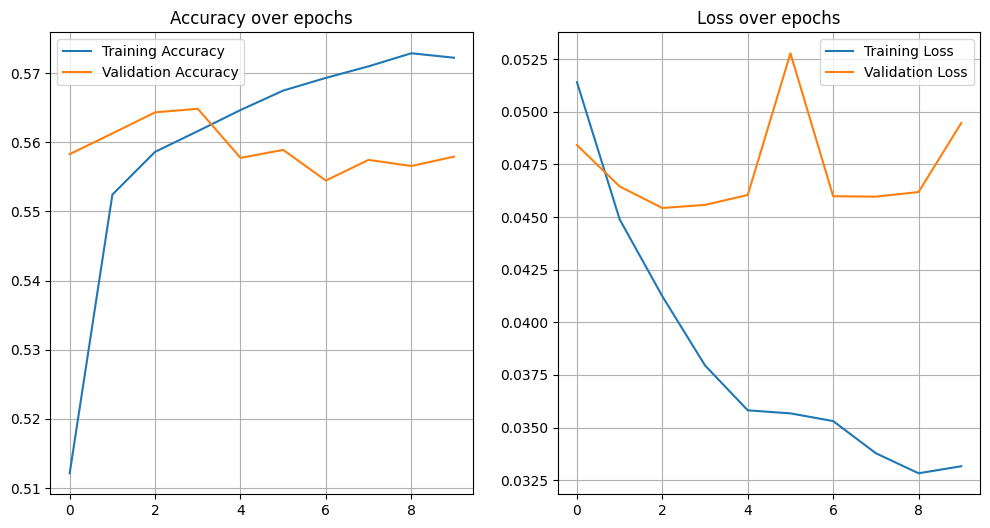

1/1 [==============================] - 1s 901ms/step


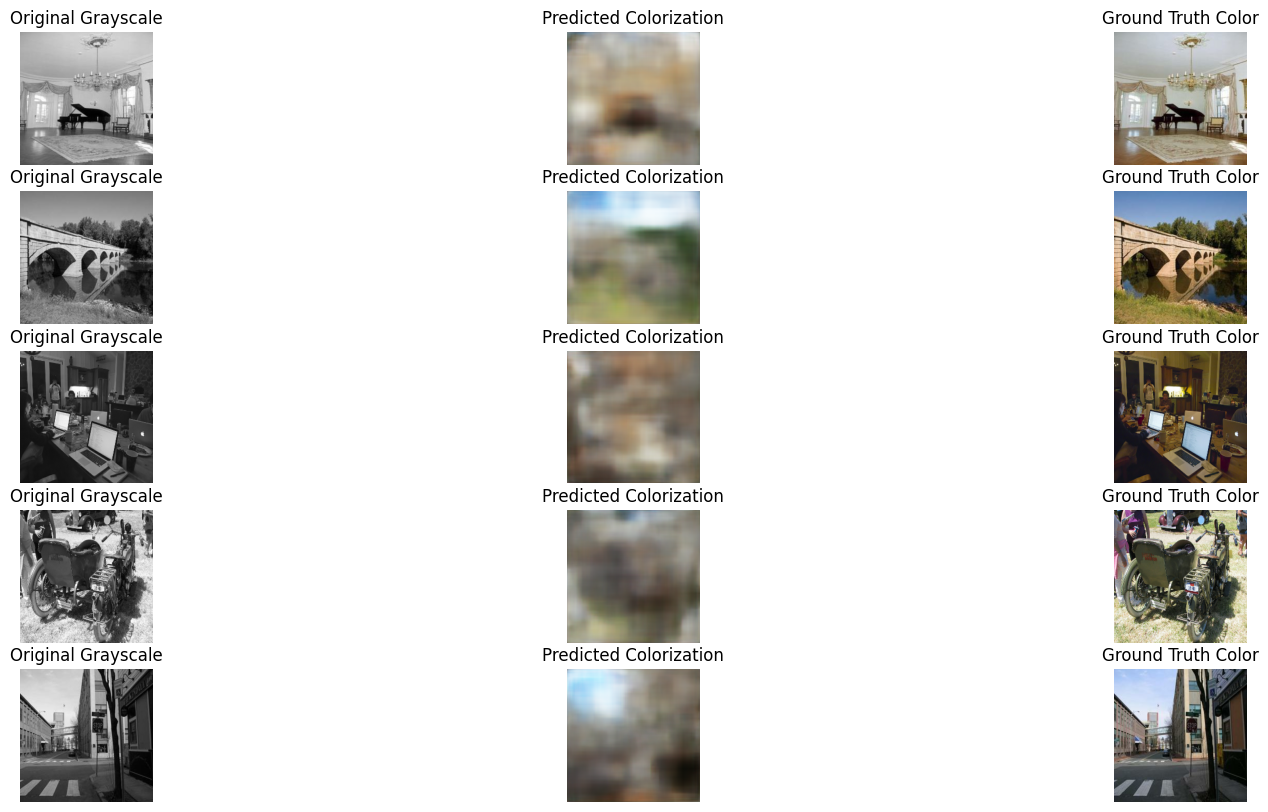

In [5]:
# final run of mobilenet for 10 epochs

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate, Activation, BatchNormalization
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def is_valid_image(file_path):
    if not tf.io.gfile.exists(file_path) or tf.io.gfile.stat(file_path).length == 0:
        return False
    try:
        img_raw = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img_raw)
    except:
        return False
    return True

def prepare_image_dataset(paths):
    valid_paths = [p for p in paths if is_valid_image(p)]
    train_paths, val_paths = train_test_split(valid_paths, test_size=0.2, random_state=42)
    return train_paths, val_paths

def process_path(file_path):
    img_raw = tf.io.read_file(file_path)
    # decode as a color image
    img_color = tf.image.decode_jpeg(img_raw, channels=3)
    img_color = tf.image.resize(img_color, [256, 256])
    img_color = tf.cast(img_color, tf.float32) / 255.0  # Normalize to [0,1]

    # color image to grayscale
    img_gray = tf.image.rgb_to_grayscale(img_color)
    img_gray = tf.image.grayscale_to_rgb(img_gray)  # grayscale back to RGB

    return img_gray, img_color  # grayscale version and the original color version


model = build_mobile_net_model()

original_dirs = [
    "/content/drive/My Drive/coco_subset/train/data",
    "/content/drive/My Drive/Places365_subset/train",
    "/content/drive/My Drive/Places365_subset/validation",
    "/content/drive/My Drive/ade20k_subset/train",
    "/content/drive/My Drive/ade20k_subset/validation"
]

all_paths = []
for dir_path in original_dirs:
    all_paths.extend([os.path.join(dir_path, fname) for fname in os.listdir(dir_path)])

def generate_dataset(paths):
    dataset = tf.data.Dataset.from_tensor_slices(paths)
    dataset = dataset.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)


train_paths, val_paths = prepare_image_dataset(all_paths)
train_dataset = generate_dataset(train_paths)
val_dataset = generate_dataset(val_paths)

epochs = 10
history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset)

def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

def show_predictions(dataset, num_examples=5):
    plt.figure(figsize=(20, 10))
    for images, targets in dataset.take(1):
        predictions = model.predict(images)
        for i in range(min(num_examples, len(images))):
            ax = plt.subplot(num_examples, 3, i * 3 + 1)
            plt.imshow(images[i].numpy().squeeze(), cmap='gray')
            plt.title('Original Grayscale')
            plt.axis('off')

            ax = plt.subplot(num_examples, 3, i * 3 + 2)
            prediction = predictions[i]
            plt.imshow(prediction)
            plt.title('Predicted Colorization')
            plt.axis('off')

            ax = plt.subplot(num_examples, 3, i * 3 + 3)
            plt.imshow(targets[i].numpy())
            plt.title('Ground Truth Color')
            plt.axis('off')

    plt.show()

plot_training_history(history)
show_predictions(val_dataset, num_examples=5)


In [6]:
# MSE and PSNR for 10 epochs

import numpy as np
import math

mse_values = []
psnr_values = []

for images, targets in val_dataset:
    predictions = model.predict(images)
    for i in range(len(images)):
        mse = np.mean((targets[i] - predictions[i]) ** 2)
        psnr = 20 * math.log10(1.0 / math.sqrt(mse))
        mse_values.append(mse)
        psnr_values.append(psnr)

mean_mse = np.mean(mse_values)
mean_psnr = np.mean(psnr_values)

print("Mean Squared Error (MSE) for MobileNet model:", mean_mse)
print("Peak Signal-to-Noise Ratio (PSNR) for MobileNet model:", mean_psnr)

1/1 [==============================] - 1s 502ms/step
Mean Squared Error (MSE) for MobileNet model: 0.04946151
Peak Signal-to-Noise Ratio (PSNR) for MobileNet model: 13.366325129942561


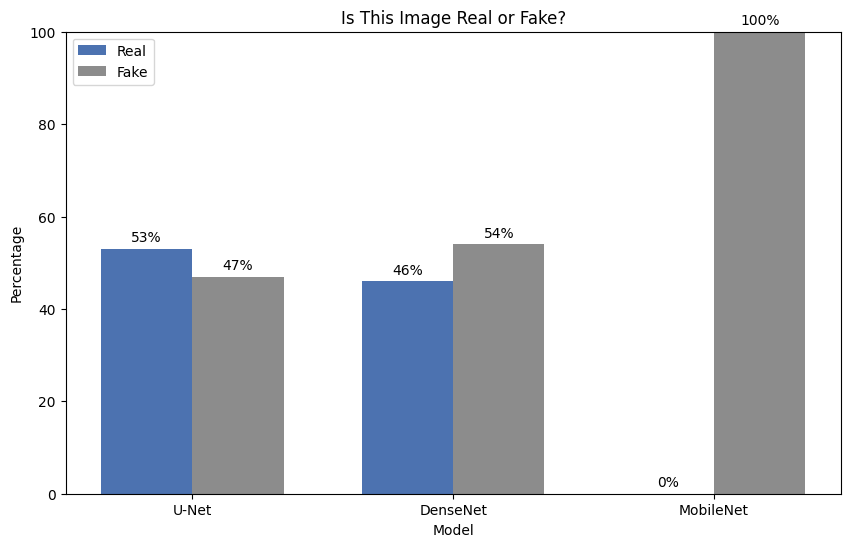

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


models = ['U-Net', 'DenseNet', 'MobileNet']
yes_percentage = [53, 46, 0]
no_percentage = [100 - p for p in yes_percentage]


yes_color = '#4c72b0'
no_color = '#8c8c8c'   # Gray

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

bar1 = ax.bar(index - bar_width/2, yes_percentage, bar_width, label='Real', color=yes_color)
bar2 = ax.bar(index + bar_width/2, no_percentage, bar_width, label='Fake', color=no_color)

for i, rect in enumerate(bar1):
    height = rect.get_height()
    ax.annotate(f'{yes_percentage[i]}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

for i, rect in enumerate(bar2):
    height = rect.get_height()
    ax.annotate(f'{no_percentage[i]}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.set_xlabel('Model')
ax.set_ylabel('Percentage')
ax.set_title('Is This Image Real or Fake?')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.set_ylim(0, 100)
ax.legend()

plt.show()



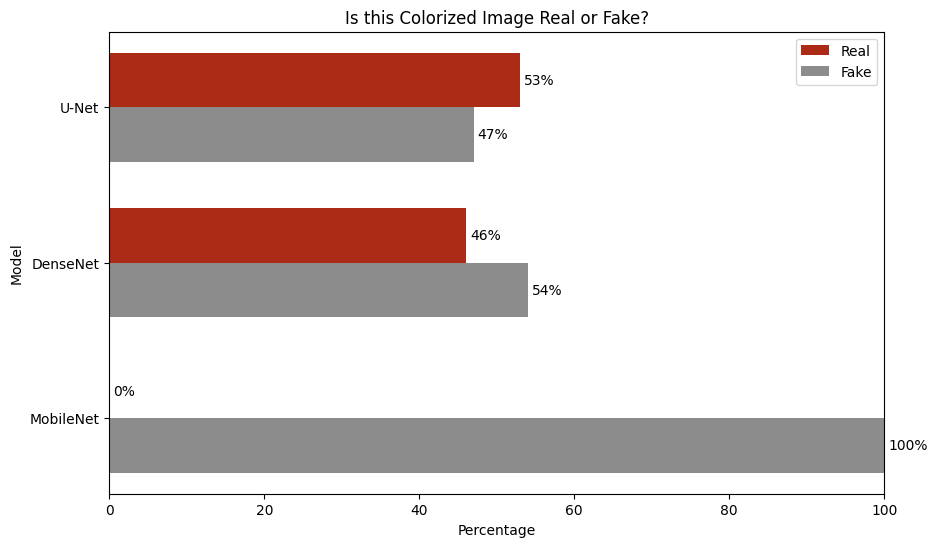

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['MobileNet', 'DenseNet', 'U-Net']
yes_percentage = [0, 46, 53]
no_percentage = [100 - p for p in yes_percentage]

yes_color = '#ac2b16'
no_color = '#8c8c8c'

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))


bar1 = ax.barh(index + bar_width/2, yes_percentage, bar_width, label='Real', color=yes_color)
bar2 = ax.barh(index - bar_width/2, no_percentage, bar_width, label='Fake', color=no_color)


for i, rect in enumerate(bar1):
    width = rect.get_width()
    ax.annotate(f'{yes_percentage[i]}%', xy=(width, rect.get_y() + rect.get_height() / 2),
                xytext=(3, 0), textcoords="offset points", ha='left', va='center')

for i, rect in enumerate(bar2):
    width = rect.get_width()
    ax.annotate(f'{no_percentage[i]}%', xy=(width, rect.get_y() + rect.get_height() / 2),
                xytext=(3, 0), textcoords="offset points", ha='left', va='center')


ax.set_ylabel('Model')
ax.set_xlabel('Percentage')
ax.set_title('Is this Colorized Image Real or Fake?')
ax.set_yticks(index)
ax.set_yticklabels(models)
ax.set_xlim(0, 100)
ax.legend()

plt.show()

